In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.shape

(1453, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

NOTE: Three columns in Dataset have different features than the other columns. The columns "Like" and "Age" have numerical features, whereas "VisitFrequency" has multiclass features.

In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [8]:
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [9]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

     Age
Age  1.0


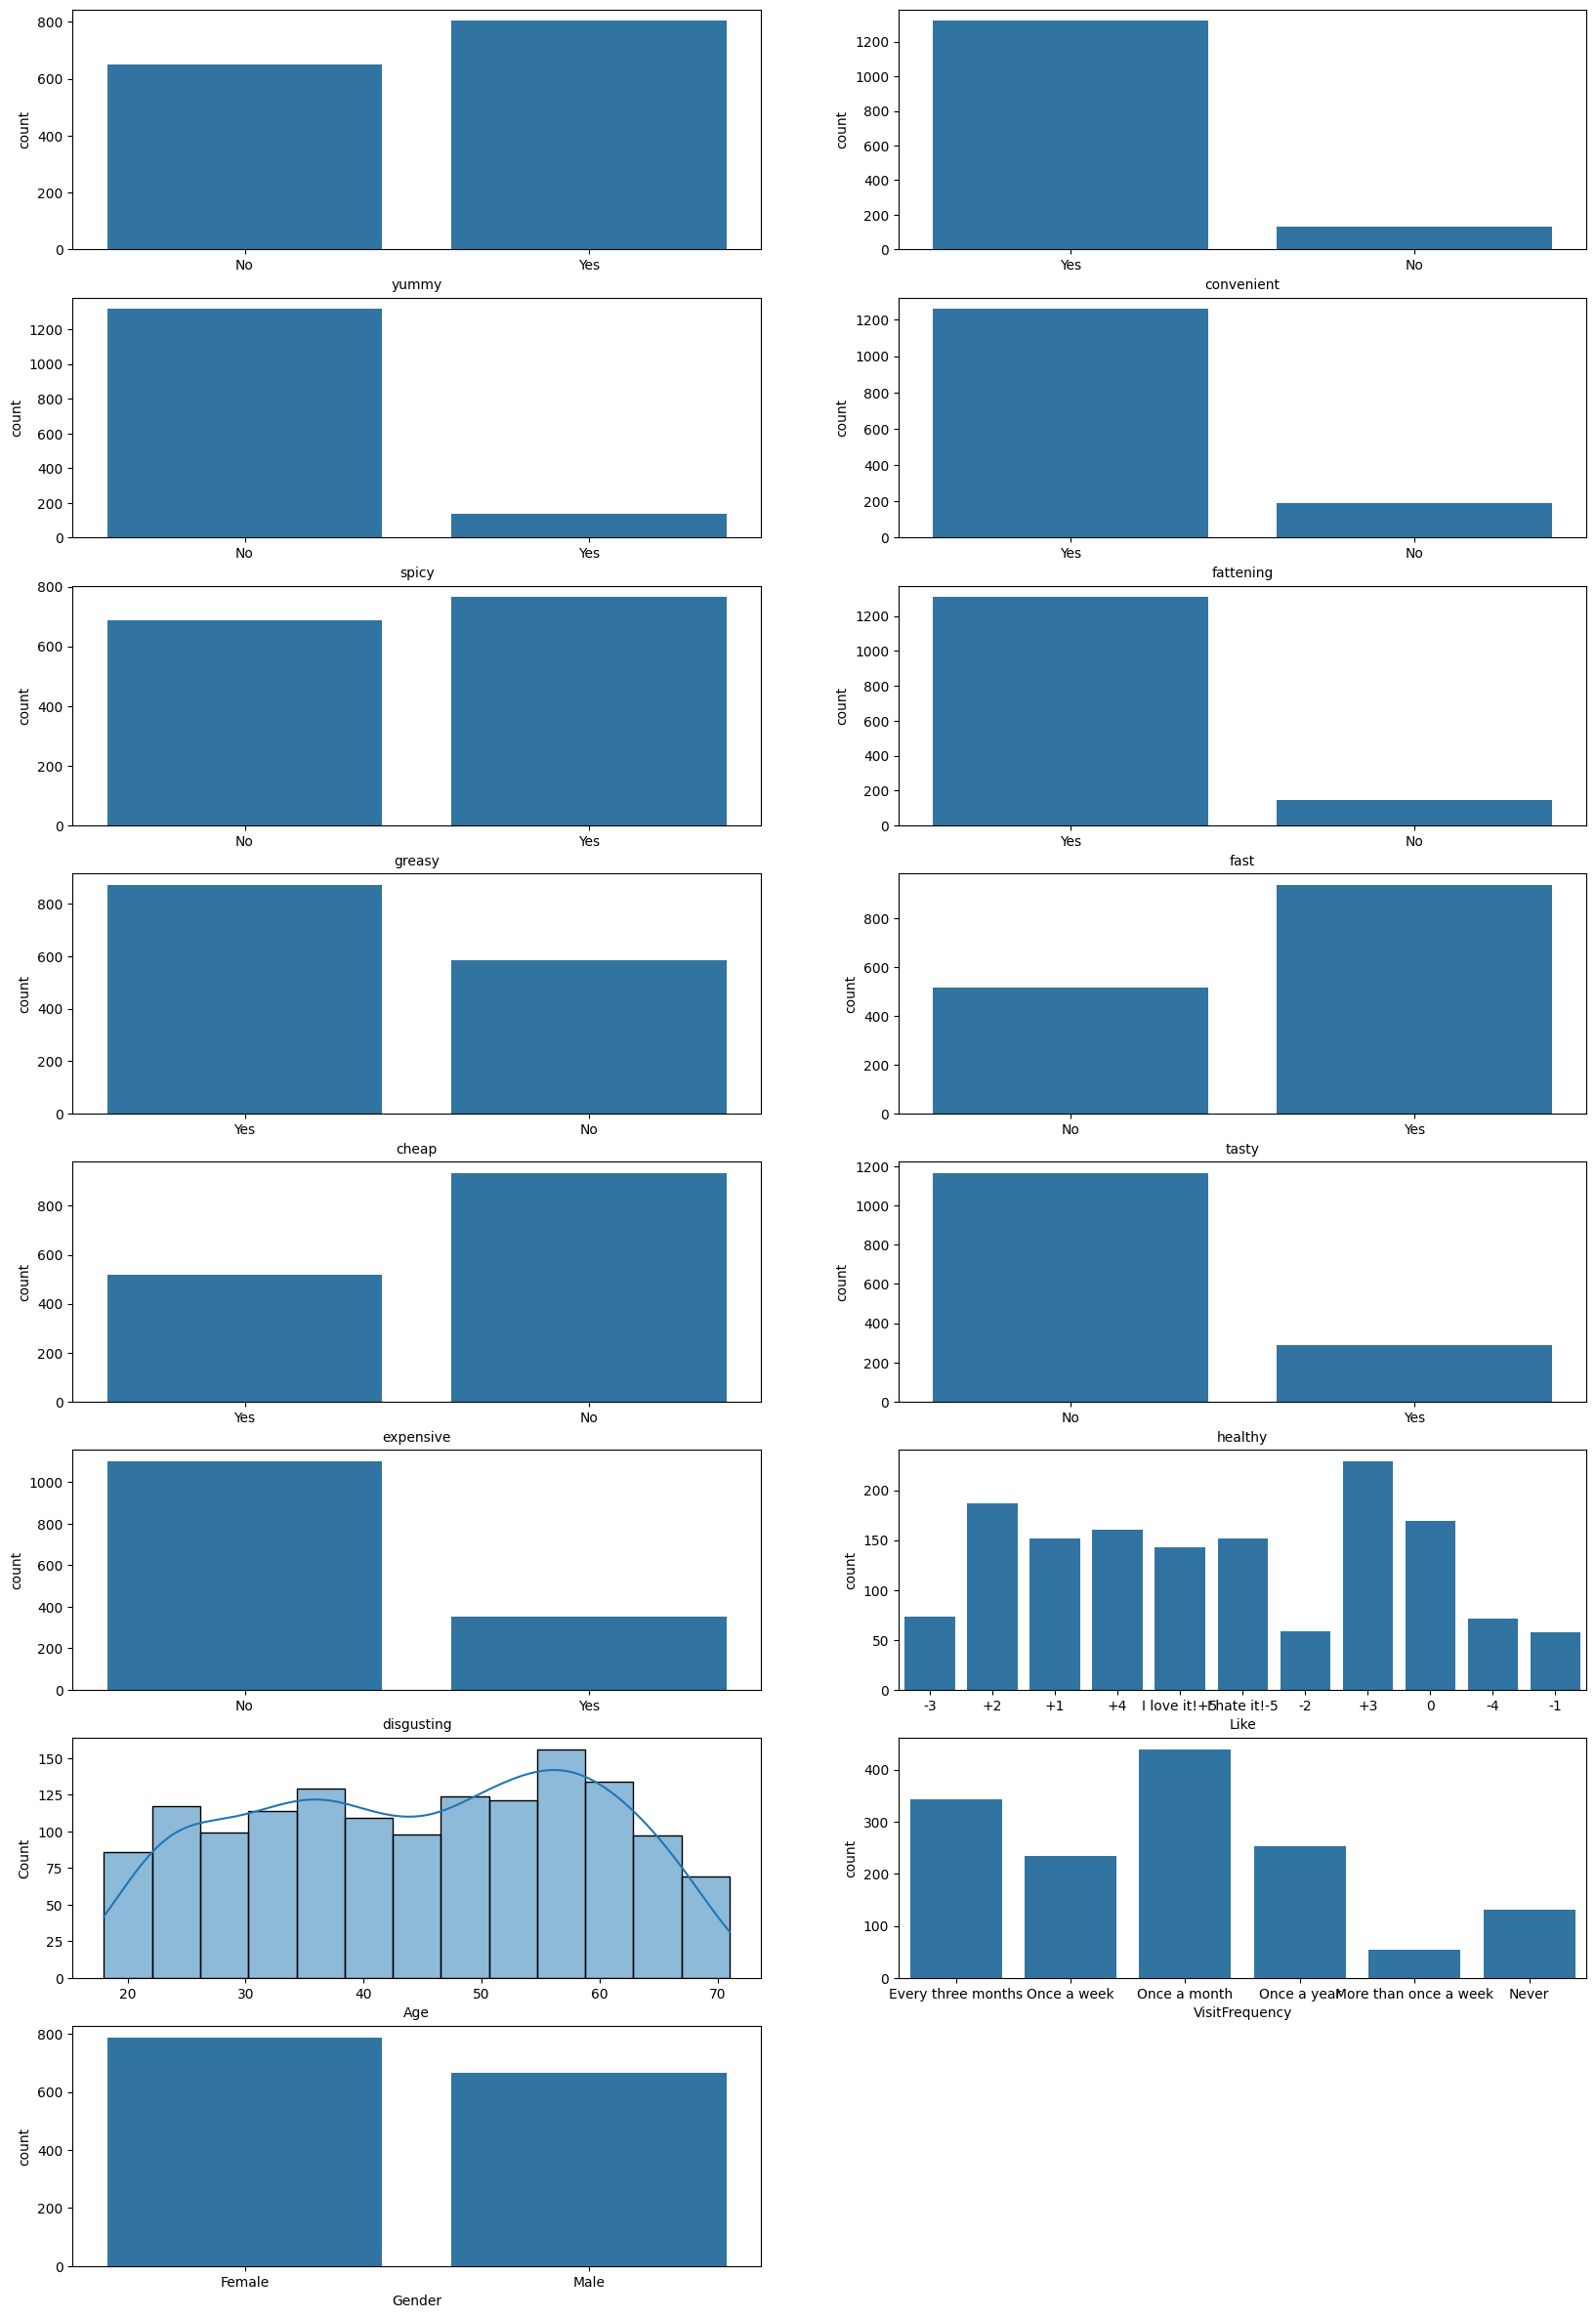

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

def EDA(df, figuresize):
    """
    Perform exploratory data analysis on the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    figuresize (tuple): The size of the figure to plot.

    Returns:
    None
    """
    # Ignore warnings
    filterwarnings("ignore")
    
    # Initialize lists to store categorical and continuous columns
    cat = []
    con = []
    
    # Determine the number of rows for the subplot grid
    num_rows = int((df.shape[1] + 1) / 2)
    
    # Create a figure with the specified size
    plt.figure(figsize=figuresize)
    
    # Initialize subplot index
    subplot_index = 1

    # Loop through each column in the DataFrame
    for col in df.columns:
        plt.subplot(num_rows, 2, subplot_index)
        subplot_index += 1
        
        if df[col].dtypes == "object":
            # If the column is categorical, append to cat list and plot a countplot
            cat.append(col)
            sns.countplot(x=df[col])
        else:
            # If the column is continuous, append to con list and plot a histplot
            con.append(col)
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                sns.histplot(df[col].dropna(), kde=True)
            except ValueError:
                print(f"Could not convert {col} to a numeric data type.")

    # Display the correlation matrix of the DataFrame
    numeric_df = df[con]  # Select only continuous columns for correlation matrix
    print(numeric_df.corr())
    plt.show()

EDA(df, (20, 30))

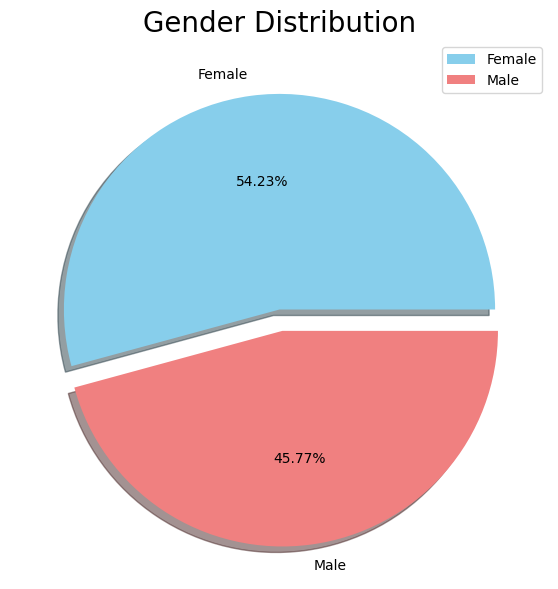

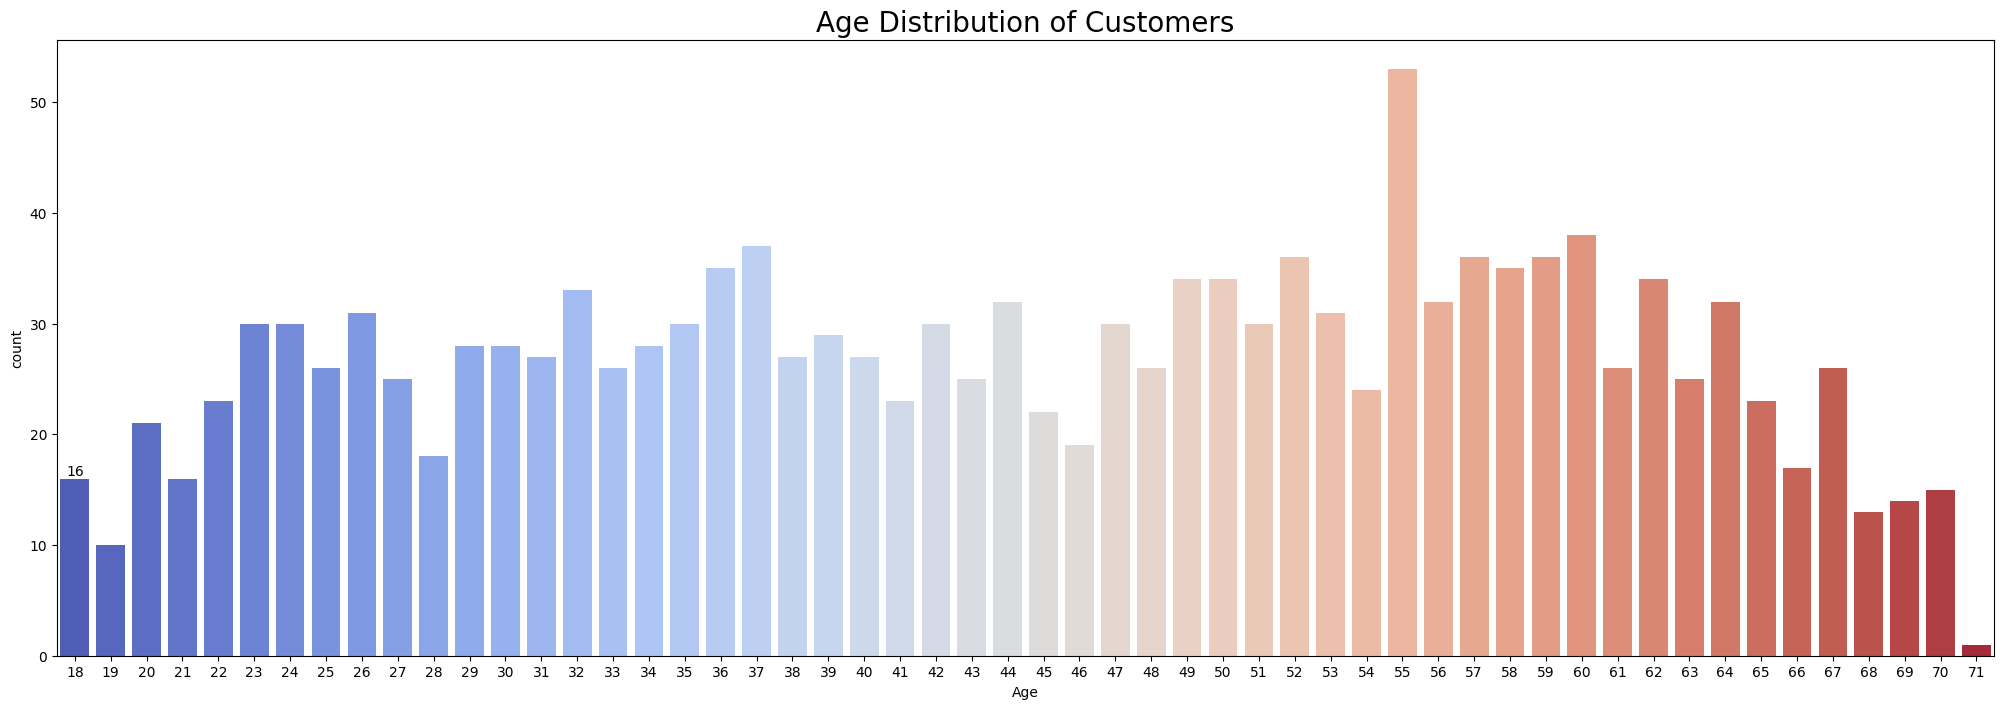

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gender_distribution(df):
    """
    Plots the gender distribution of the customers.

    Parameters:
    df (pd.DataFrame): The DataFrame containing customer data.

    Returns:
    None
    """
    labels = ['Female', 'Male']
    size = df['Gender'].value_counts()
    # Change colors here
    colors = ['skyblue', 'lightcoral']
    explode = [0, 0.1]
    
    plt.rcParams['figure.figsize'] = (7, 7)
    plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
    plt.title('Gender Distribution', fontsize=20)
    plt.axis('off')
    plt.legend()
    plt.show()

def plot_age_distribution(df):
    """
    Plots the age distribution of the customers.

    Parameters:
    df (pd.DataFrame): The DataFrame containing customer data.

    Returns:
    None
    """
    plt.rcParams['figure.figsize'] = (25, 8)
    # Check if 'Age' column exists
    if 'Age' not in df.columns:
        print("Error: 'Age' column not found in DataFrame")
        print("Available columns:", df.columns)
        return
    # Change palette here
    data = sns.countplot(x=df['Age'], palette='coolwarm')
    data.bar_label(data.containers[0])
    plt.title('Age Distribution of Customers', fontsize=20)
    plt.show()

def demographic_segmentation(df):
    """
    Performs demographic segmentation analysis on the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    plot_gender_distribution(df)
    plot_age_distribution(df)


demographic_segmentation(df)

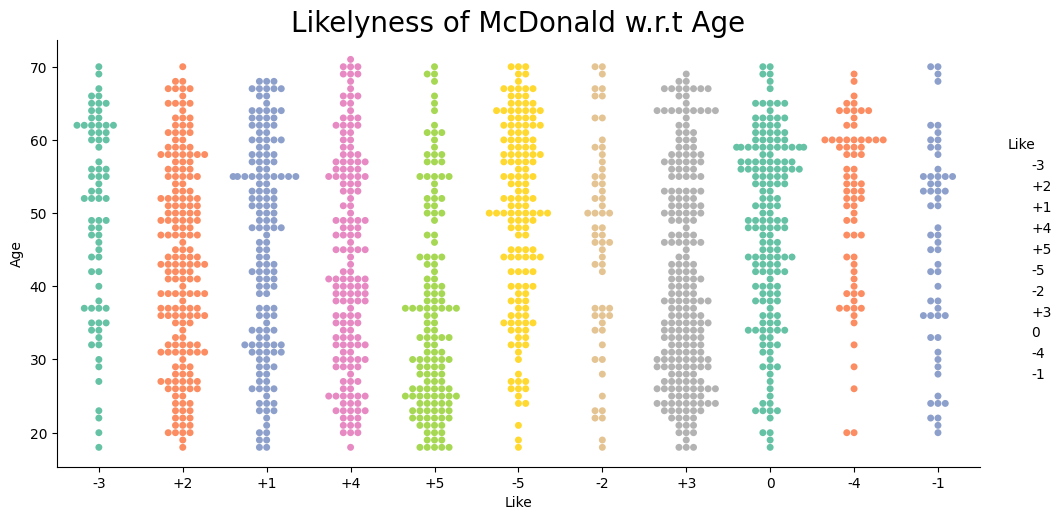

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def rename_like_column(df):
    """
    Rename the 'Like' column categories for convenience.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.

    Returns:
    pd.DataFrame: The modified DataFrame.
    """
    df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})
    return df

def plot_like_vs_age(df):
    """
    Plot the 'Like' vs 'Age' distribution.

    Parameters:
    df (pd.DataFrame): The DataFrame containing customer data.

    Returns:
    None
    """
    sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2", kind="swarm")
    plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
    plt.show()

def psychographic_segmentation(df):
    """
    Perform psychographic segmentation analysis on the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    df = rename_like_column(df)
    plot_like_vs_age(df)

psychographic_segmentation(df)

# Data Preprocessing

In [14]:
def prepare_df_for_label_encoding(df):
    """
    Prepare the DataFrame for label encoding by dropping specified columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.

    Returns:
    pd.DataFrame: The modified DataFrame with specified columns dropped.
    """
    columns_to_drop = ['Like', 'Age', 'VisitFrequency', 'Gender']
    df_new = df.drop(columns=columns_to_drop, axis=1)
    return df_new

# Example usage:
# df = pd.read_csv('your_dataset.csv')
df_new = prepare_df_for_label_encoding(df)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [15]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to map 'Yes' to 1 and 'No' to 0 for all binary features
df_encoded = df_new.apply(lambda col: LabelEncoder().fit_transform(col))

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


# Applying PCA

In [16]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Apply scaling to the encoded DataFrame
scaled_data = preprocessing.scale(df_encoded)

# Perform PCA with 11 components
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_data)

# Define column names for the principal components
names = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11']

# Create a DataFrame to store the principal components
pca_df = pd.DataFrame(data=principal_components, columns=names)

# Display the first few rows of the PCA-transformed DataFrame
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [17]:
# Calculate explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios
print("Explained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratios):
    print(f"PC{i+1}: {ratio:.4f}")

# Alternatively, you can directly access and display them as a list
print("\nExplained Variance Ratios (as list):")
print(explained_variance_ratios.tolist())

Explained Variance Ratios:
PC1: 0.2556
PC2: 0.1483
PC3: 0.1255
PC4: 0.0983
PC5: 0.0835
PC6: 0.0711
PC7: 0.0650
PC8: 0.0538
PC9: 0.0476
PC10: 0.0280
PC11: 0.0234

Explained Variance Ratios (as list):
[0.2555663694195502, 0.14834762332752913, 0.12546908611226032, 0.0982697088961743, 0.08348356062198277, 0.07109101898621481, 0.0649855862217978, 0.05384477295874969, 0.04762808732742247, 0.02796378703940089, 0.023350399088917517]


In [18]:
# Get the loadings (correlation coefficients) between original variables and principal components
loadings = pca.components_

# Create a list of PC labels
pc_list = ["PC"+str(i+1) for i in range(len(loadings))]

# Create a DataFrame from the loadings with original feature names as index
loadings_df = pd.DataFrame(loadings.T, columns=pc_list, index=df_encoded.columns)

# Display the DataFrame
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614
healthy,-0.266839,0.201031,0.367814,0.301990,0.051787,-0.446166,-0.449446,-0.446110,0.219269,-0.054544,-0.089903


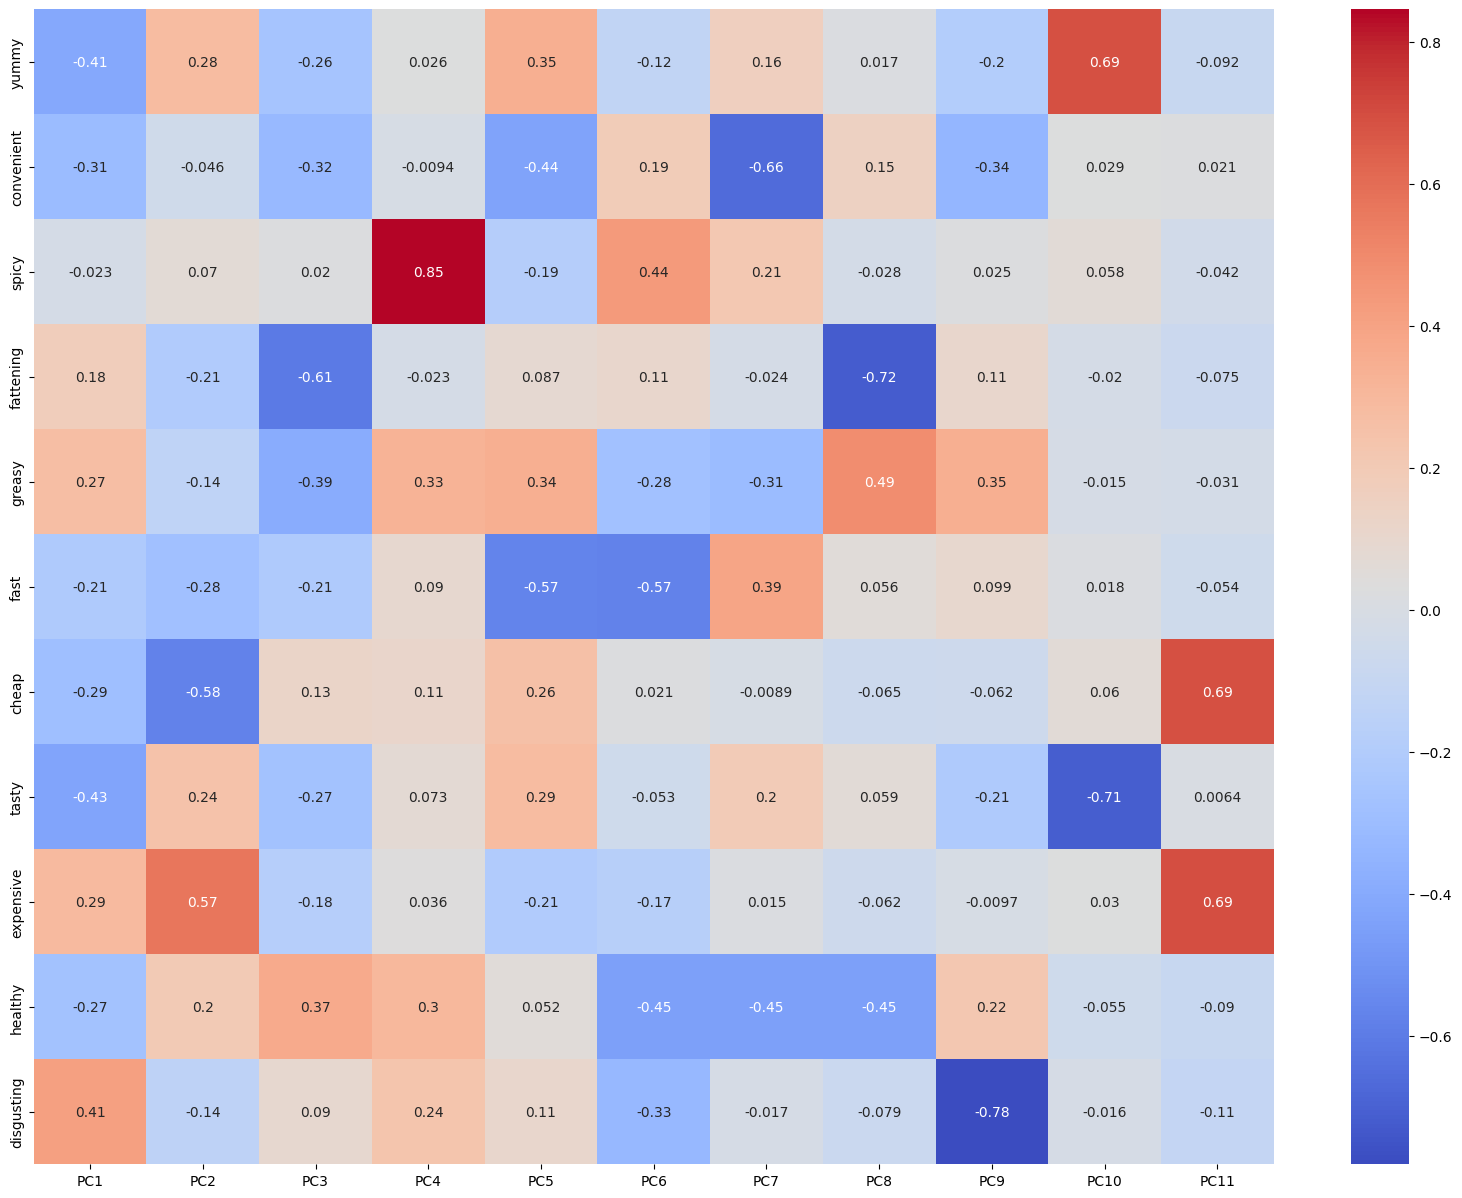

In [19]:
# correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.show()

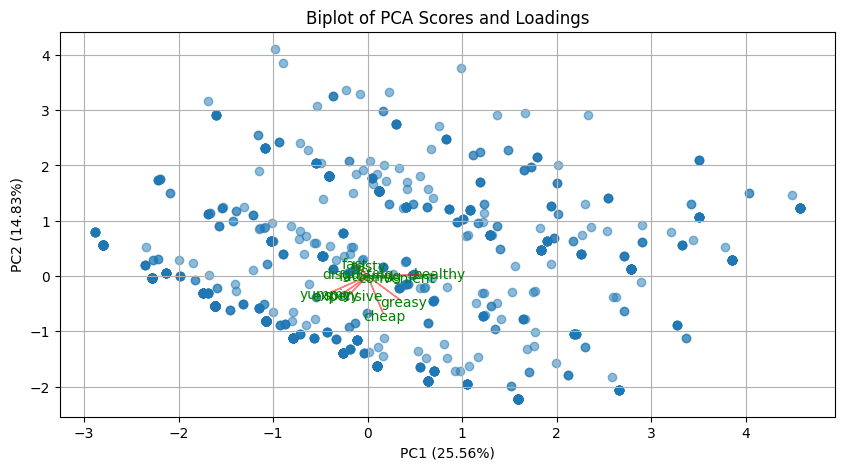

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def biplot(scores, loadings, labels, var1, var2, show=True, dim=(10, 5)):
    """
    Create a biplot of PCA scores and loadings.

    Parameters:
    scores (numpy.ndarray): PCA scores (transformed data).
    loadings (numpy.ndarray): PCA loadings (correlation coefficients).
    labels (list): List of feature labels.
    var1 (float): Variance explained by PC1.
    var2 (float): Variance explained by PC2.
    show (bool): Whether to display the plot (default True).
    dim (tuple): Dimensions of the plot (default (10, 5)).

    Returns:
    None
    """
    plt.figure(figsize=dim)

    # Plot PC scores
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)

    # Plot arrows for loadings
    for i, label in enumerate(labels):
        plt.arrow(0, 0, loadings[0, i], loadings[1, i], color='r', alpha=0.5)
        plt.text(loadings[0, i]*1.1, loadings[1, i]*1.1, label, color='g', ha='center', va='center')

    plt.xlabel(f'PC1 ({var1}%)')
    plt.ylabel(f'PC2 ({var2}%)')
    plt.title('Biplot of PCA Scores and Loadings')

    if show:
        plt.grid()
        plt.show()

# Example usage:
# Assuming pca_data is defined as scaled data
scaler = StandardScaler()
pca_data = scaler.fit_transform(df_encoded)

pca = PCA()
pca_scores = pca.fit_transform(pca_data)
biplot(scores=pca_scores, loadings=pca.components_.T, labels=df_encoded.columns.values,
       var1=round(pca.explained_variance_ratio_[0]*100, 2),
       var2=round(pca.explained_variance_ratio_[1]*100, 2))


# Applying the Elbow Method

In [21]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


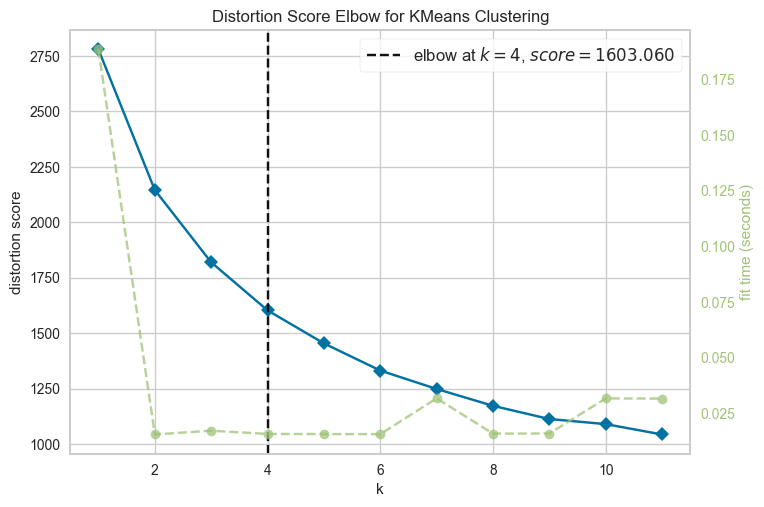

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Initialize KMeans model
model = KMeans()

# Instantiate the KElbowVisualizer with a range of K values
visualizer = KElbowVisualizer(model, k=(1, 12))

# Fit the visualizer to the encoded DataFrame
visualizer.fit(df_encoded)

# Show the plot
visualizer.show()

# Applying the K-Means Clustering Algorithm

In [23]:
from sklearn.cluster import KMeans
from collections import Counter

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)

# Assign cluster labels to the original DataFrame
df['cluster_num'] = kmeans.labels_

# Print cluster labels assigned to each data point
print('Cluster Labels:', kmeans.labels_)

# Print the within-cluster sum of squares (WCSS)
print('WCSS (Within-Cluster Sum of Squares):', kmeans.inertia_)

# Print the number of iterations run by the K-means algorithm
print('Number of Iterations:', kmeans.n_iter_)

# Print the coordinates of cluster centroids
print('Cluster Centroids:', kmeans.cluster_centers_)

# Print the size of each cluster
print('Cluster Sizes:', Counter(kmeans.labels_))

Cluster Labels: [0 2 2 ... 2 1 3]
WCSS (Within-Cluster Sum of Squares): 1602.9303457472106
Number of Iterations: 9
Cluster Centroids: [[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]
Cluster Sizes: Counter({1: 580, 2: 324, 0: 309, 3: 240})


Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
       'pc11'],
      dtype='object')


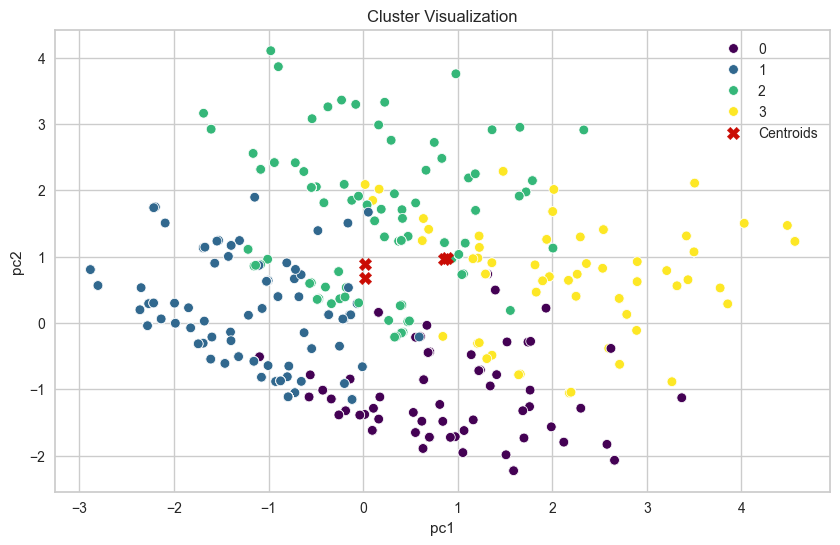

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca_df is already defined as the PCA-transformed data
# Check the column names in pca_df to ensure they match your expectations
print(pca_df.columns)

# Scatter plot of PC1 vs PC2 with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x=pca_df.columns[0], y=pca_df.columns[1], hue=kmeans.labels_, palette='viridis', legend='full')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="Centroids")

# Add legend
plt.legend()

# Set plot title and labels
plt.title('Cluster Visualization')
plt.xlabel(pca_df.columns[0])
plt.ylabel(pca_df.columns[1])

# Show plot
plt.grid(True)
plt.show()

# Describing Segments

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,54,36,34,29,26,53,32,31,12,2,0
1,4,4,2,6,13,43,65,90,143,111,99
2,5,4,7,6,7,36,42,60,66,47,44
3,89,27,30,18,12,37,13,6,8,0,0


<Figure size 700x700 with 0 Axes>

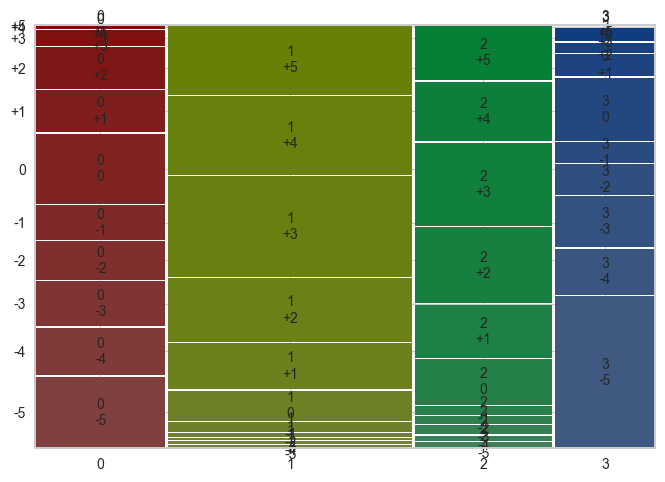

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Creating cross-tabulation
crosstab = pd.crosstab(df['cluster_num'], df['Like']).loc[:, ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]

# Plotting mosaic plot
plt.figure(figsize=(7, 7))
mosaic(crosstab.stack())

# Displaying cross-tabulation and plot
display(crosstab)
plt.show()

Gender,Female,Male
cluster_num,,
0,183,126
1,349,231
2,155,169
3,101,139


<Figure size 700x500 with 0 Axes>

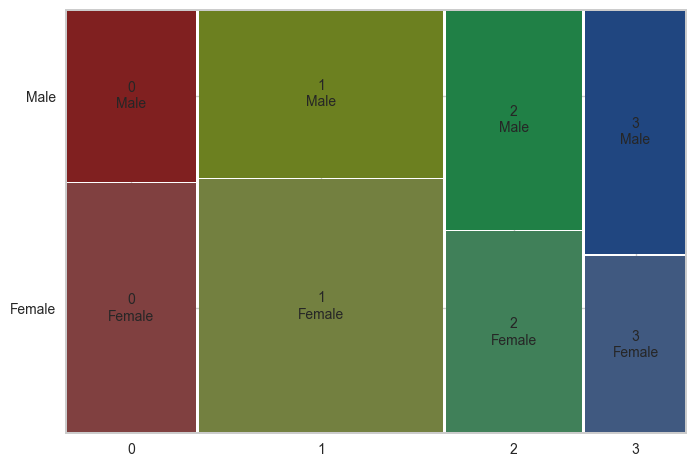

In [26]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Create a cross-tabulation of clusters by gender
crosstab_gender = pd.crosstab(df['cluster_num'], df['Gender'])

# Display the cross-tabulation
display(crosstab_gender)

# Plot a mosaic plot for the cross-tabulation
plt.figure(figsize=(7, 5))
mosaic(crosstab_gender.stack())

# Show the plot
plt.show()

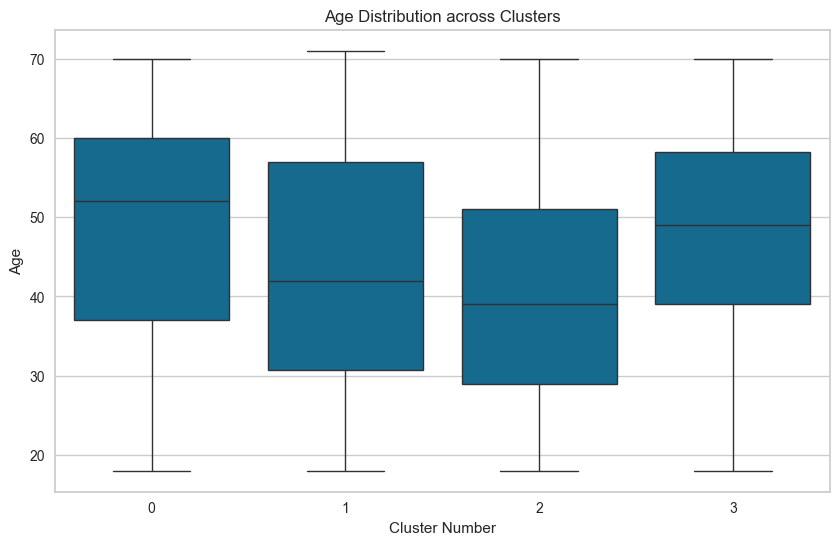

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot showing 'Age' distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster_num", y="Age", data=df)

# Customize plot labels and title
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.title('Age Distribution across Clusters')

# Show the plot
plt.show()

# Selecting the Target Segment

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode 'VisitFrequency' using LabelEncoder
df['VisitFrequency_encoded'] = LabelEncoder().fit_transform(df['VisitFrequency'])

# Calculate mean 'VisitFrequency' for each cluster
visit_mean = df.groupby('cluster_num')['VisitFrequency_encoded'].mean().reset_index()

# Rename columns for clarity
visit_mean.columns = ['Cluster Number', 'Mean Visit Frequency']

# Display the resulting dataframe
visit_mean

,Cluster Number,Mean Visit Frequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode 'Like' using LabelEncoder
df['Like_encoded'] = LabelEncoder().fit_transform(df['Like'])

# Calculate mean 'Like' for each cluster
like_mean = df.groupby('cluster_num')['Like_encoded'].mean().reset_index()

# Rename columns for clarity
like_mean.columns = ['Cluster Number', 'Mean Like']

# Display the resulting dataframe
like_mean

,Cluster Number,Mean Like
0,0,6.171521
1,1,2.962069
2,2,3.290123
3,3,7.445833


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode 'Gender' using LabelEncoder
df['Gender_encoded'] = LabelEncoder().fit_transform(df['Gender'])

# Calculate mean 'Gender' for each cluster
gender_mean = df.groupby('cluster_num')['Gender_encoded'].mean().reset_index()

# Rename columns for clarity
gender_mean.columns = ['Cluster Number', 'Mean Gender']

# Display the resulting dataframe
gender_mean

,Cluster Number,Mean Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace with your actual DataFrame)
data = {
    'cluster_num': [1, 1, 2, 2, 3],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Like': ['A', 'B', 'A', 'C', 'B'],
    'VisitFrequency': ['Every three months', 'Once a month', 'Once a month', 'Never', 'Once a year']
}
df = pd.DataFrame(data)

# Encode categorical columns
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
df['Like_encoded'] = label_encoder.fit_transform(df['Like'])
df['VisitFrequency_encoded'] = label_encoder.fit_transform(df['VisitFrequency'])

# Calculate mean of encoded columns for each cluster
gender_mean = df.groupby('cluster_num')['Gender_encoded'].mean().reset_index()
like_mean = df.groupby('cluster_num')['Like_encoded'].mean().reset_index()
visit_mean = df.groupby('cluster_num')['VisitFrequency_encoded'].mean().reset_index()

# Merge the mean values into a single DataFrame
segment = pd.merge(gender_mean, like_mean, on='cluster_num', how='left')
segment = pd.merge(segment, visit_mean, on='cluster_num', how='left')

# Rename columns for clarity
segment.columns = ['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency']

# Display the resulting DataFrame
print(segment)

   Cluster Number  Mean Gender  Mean Like  Mean VisitFrequency
0               1          0.5        0.5                  1.0
1               2          0.5        1.0                  1.5
2               3          1.0        1.0                  3.0


In [34]:
# segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
# segment

In [33]:
df['Gender']

0      Male
1    Female
2    Female
3      Male
4      Male
Name: Gender, dtype: object

In [35]:
# Print the column names and their data types
print(segment.columns)
print(segment.dtypes)

Index(['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency'], dtype='object')
Cluster Number           int64
Mean Gender            float64
Mean Like              float64
Mean VisitFrequency    float64
dtype: object


Index(['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency'], dtype='object')


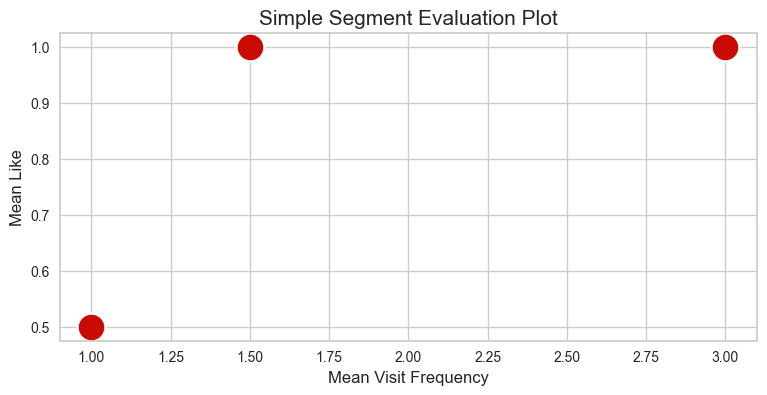

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'segment' DataFrame is already defined and contains necessary data
# Make sure to double-check the column names in your actual DataFrame
print(segment.columns)  # Print column names to verify

# Plotting the scatter plot with correct column names
plt.figure(figsize=(9, 4))
sns.scatterplot(x="Mean VisitFrequency", y="Mean Like", data=segment, s=400, color="r")

# Customizing plot labels and title
plt.title("Simple Segment Evaluation Plot", fontsize=15)
plt.xlabel("Mean Visit Frequency", fontsize=12)
plt.ylabel("Mean Like", fontsize=12)

# Displaying the plot
plt.show()